In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

import mglearn

## Decision Tree

- 핸즈온 p229-
- 분류, 회귀, 다중 출력 가능
- 설명하기 좋은 알고리즘
- 과적합 문제 (과적합 될 확률이 높다)
- 전처리가 거의 필요없다. (표준화, scaling, 정규화)
- 균일도 측정방식 (p236-, 의사결정나무.pdf)
    + 엔트로피를 이용한 Information Gain 지수 (ID3 알고리즘)
    + 지니 계수

### 시각화 도구 설치

- http://www.graphviz.org
    + 프로그램 다운로드 후 설치(path 설정까지)
    
- pip install graphviz

In [3]:
!pip install graphviz

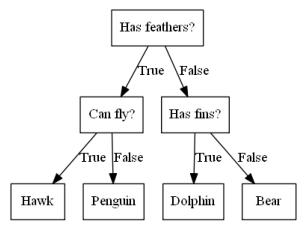

In [9]:
import os

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
mglearn.plots.plot_animal_tree()

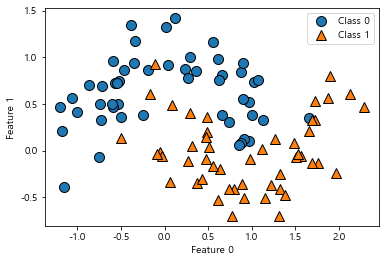

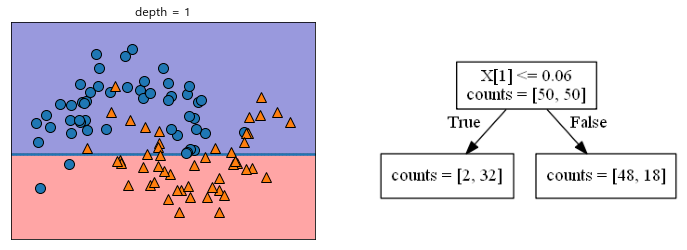

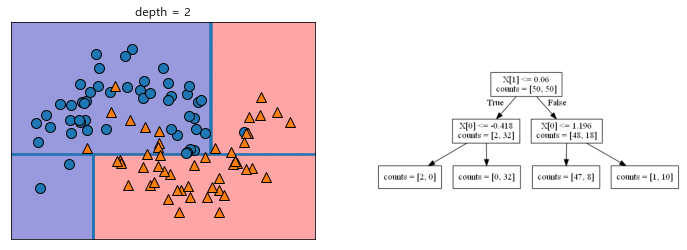

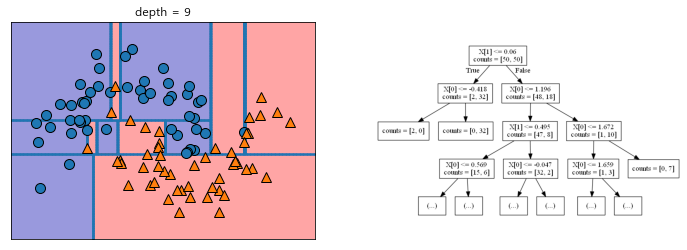

In [10]:
mglearn.plots.plot_tree_progressive() #나누는 기준-> 균일도를 측정함

### 균일도 측정 방법

+ 엔트로피(혼잡도)를 이용한 Information Gain(정보 이득)지수(ID3 알고리즘)
+ 지니 계수: 
    - 0(평등) : 값이 다양하게 섞여있음, 균일하지 않음
    - 1(불평등) : 값이 균일하지 않게 섞여있음, 편향적임

---
###  복잡도 제어: Prunning(가지치기)

- 핸즈온 p237-규제 매개변수
- 종류
    + 사전 가지치기
    + 사후 가지치기
    + sklearn에서는 사후 가지치기만 지원
    
- 파라미터
    + min_samples_split
    + min_samples_leaf
    + max_features
    + max_depth
    + max_leaf_nodes

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import warnings 
warnings.filterwarnings('ignore')

In [62]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

In [63]:
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_train, y_train)

In [64]:
from sklearn.tree import export_graphviz

In [65]:
import os
import graphviz

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names, 
                feature_names=iris.feature_names, impurity=True, filled=True)

In [66]:
#os.environ["PATH"]+=os.pathsep+"C:\Program Files (x86)\Graphviz2.38\bin"

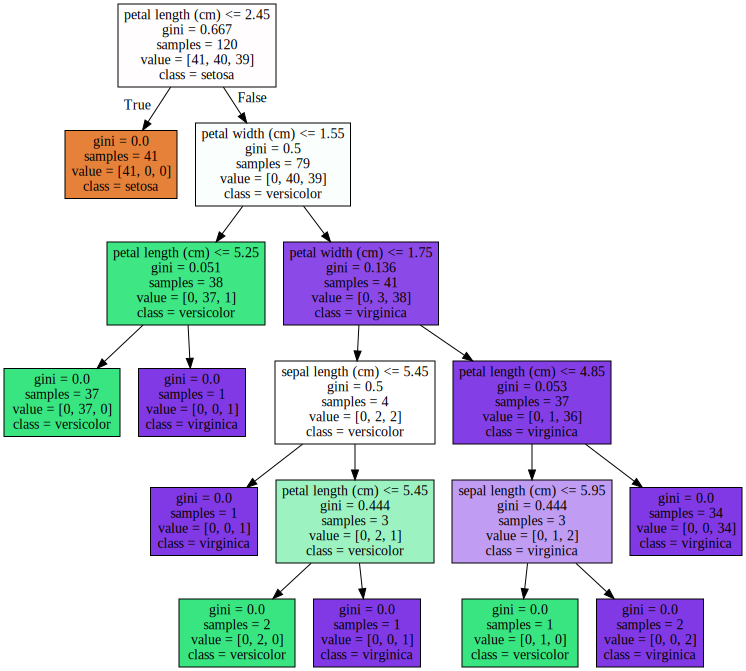

In [67]:
with open("data/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [68]:
#max_depth
df_clf = DecisionTreeClassifier(random_state=156,max_depth=3).fit(X_train, y_train)

export_graphviz(df_clf, out_file="data/tree.dot", class_names=iris.target_names, 
                feature_names=iris.feature_names, impurity=True, filled=True)

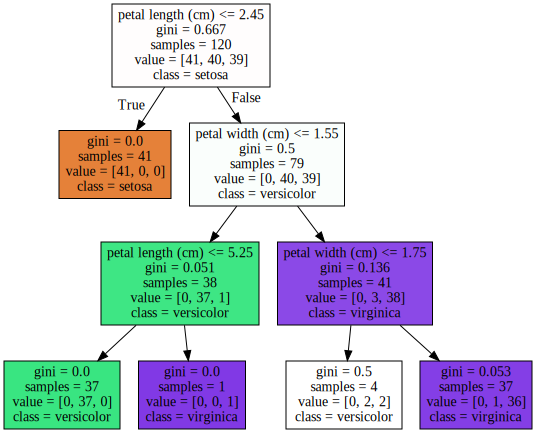

In [69]:
with open("data/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

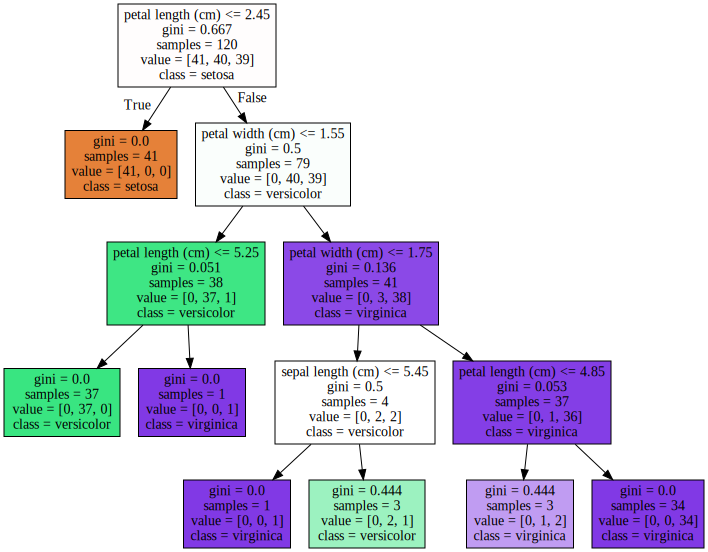

In [39]:
#min_samples_split: 분할하기 위한 샘플 수 조정
df_clf=DecisionTreeClassifier(random_state=156, min_samples_split=4).fit(X_train, y_train)

export_graphviz(df_clf, out_file="data/tree.dot", class_names=iris.target_names, 
                feature_names=iris.feature_names, impurity=True, filled=True)

with open("data/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

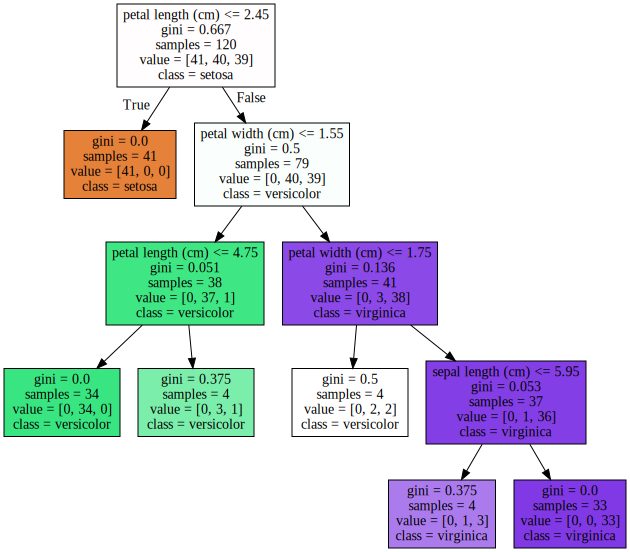

In [70]:
#min_samples_leaf: 단말 노드가 되기 위한 최소 샘플 수 (정해진 수와 샘플수가 작거나 같으면 단말노드가 됨)
df_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4).fit(X_train,y_train)

export_graphviz(df_clf, out_file="data/tree.dot", class_names=iris.target_names, feature_names=iris.feature_names,
                impurity=True, filled=True)

with open("data/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

--- 
### 특성 중요도

In [42]:
print(dt_clf.feature_importances_)

[0.02500521 0.         0.55490281 0.42009198]


In [43]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(name, value)

sepal length (cm) 0.02500520941862888
sepal width (cm) 0.0
petal length (cm) 0.5549028149313102
petal width (cm) 0.42009197565006084


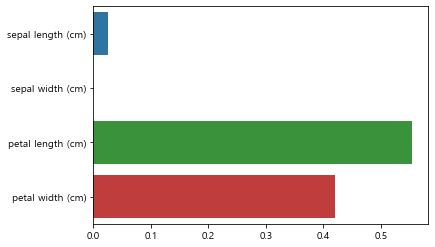

In [44]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

### breast_cancer 데이터셋 활용

In [51]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
# stratify->데이터를 여러개의 계층으로 나누어서 골고루 뽑음

In [52]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)

In [53]:
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))
#차이가 너무 많이 남 => 과적합

훈련 정확도 :  0.9882629107981221
테스트 정확도 :  0.951048951048951


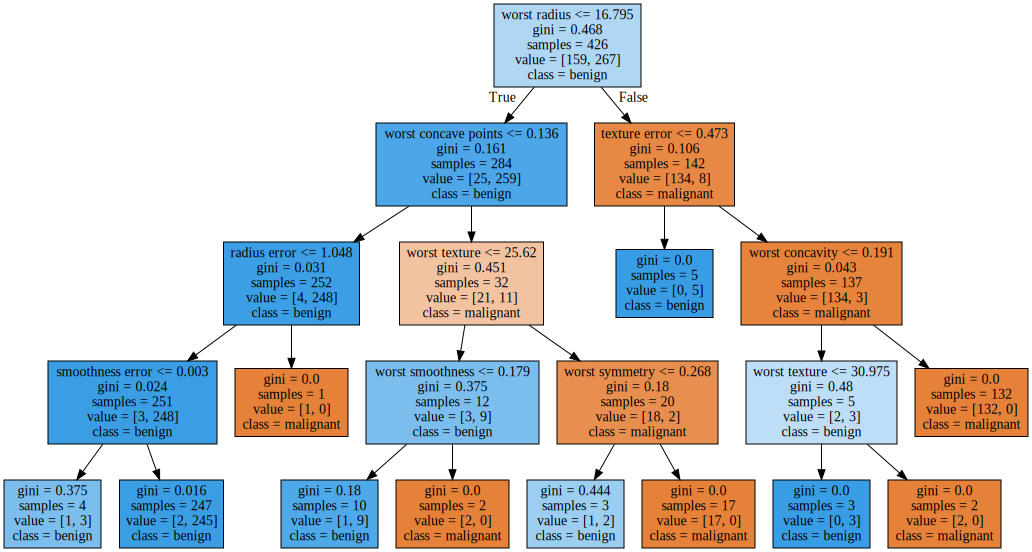

In [54]:
export_graphviz(tree, out_file="data/tree.dot", class_names=["malignant","benign"], 
                feature_names=cancer.feature_names,impurity=True, filled=True)

with open("data/tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [55]:
tree= DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train,y_train)
print("훈련 정확도",tree.score(X_train,y_train))
print("테스트 정확도",tree.score(X_test,y_test))

훈련 정확도 0.9882629107981221
테스트 정확도 0.951048951048951


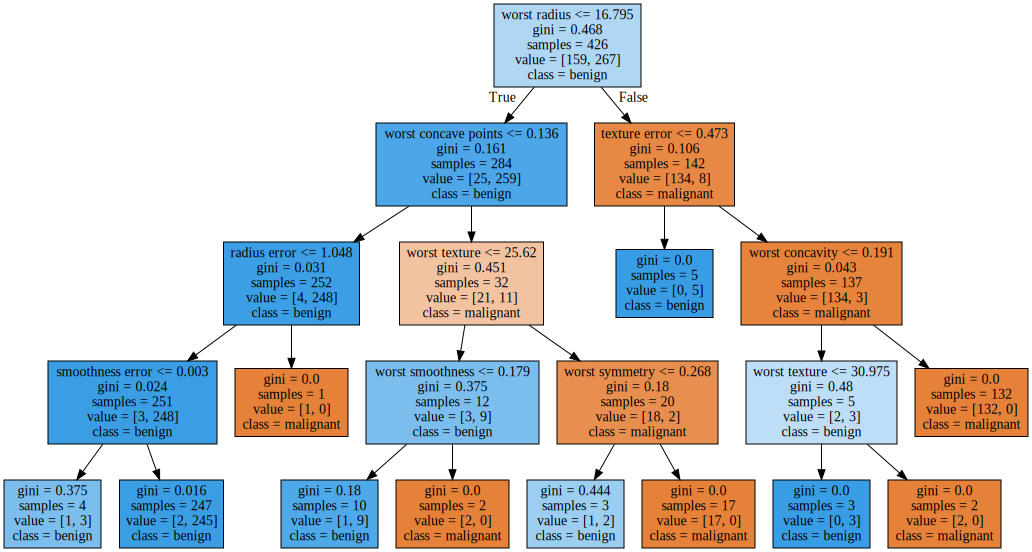

In [56]:
export_graphviz(tree,out_file="data/tree.dot", class_names=["malignant","benign"], feature_names=cancer.feature_names,
                impurity=True, filled=True)

with open("data/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [57]:
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


([<matplotlib.axis.YTick at 0x28b3059c310>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
  

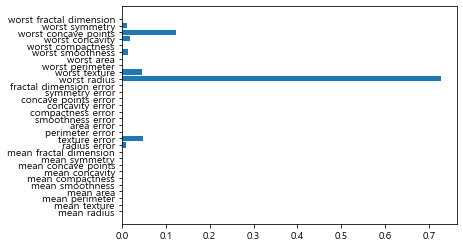

In [59]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align="center")
plt.yticks(np.arange(n_features), cancer.feature_names)

### 사례1: iris 데이터 활용

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

In [4]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df["result"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
model = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [10]:
print("훈련 정확도 : ", model.score(X_train, y_train))
print("테스트 정확도 : ", model.score(X_test, y_test))

훈련 정확도 :  0.9821428571428571
테스트 정확도 :  0.9736842105263158


In [11]:
model = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=3)
model.fit(X_train_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [13]:
print("훈련 정확도 : ", model.score(X_train_std, y_train))
print("테스트 정확도 : ", model.score(X_test_std, y_test))
# 표준화한 결과 차이 없다!

훈련 정확도 :  0.9821428571428571
테스트 정확도 :  0.9736842105263158


### 사례2 : 서울 지역 동 분류

- 서울 지역(구)의 경도와 위도를 사용해서 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [14]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [22]:
train_df = pd.DataFrame(district_dict_list)
train_df = train_df[["district", "longitude", "latitude", "label"]]
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


In [24]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [26]:
test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[["dong", "longitude", "latitude", "label"]]
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


In [28]:
# 현재 가지고 있는 데이터에서 레이블의 개수 확인

print(train_df.label.value_counts())
print(test_df.label.value_counts())

Gangnam     5
Gangseo     5
Gangdong    5
Gangbuk     5
Name: label, dtype: int64
Gangnam     5
Gangseo     5
Gangdong    5
Gangbuk     5
Name: label, dtype: int64


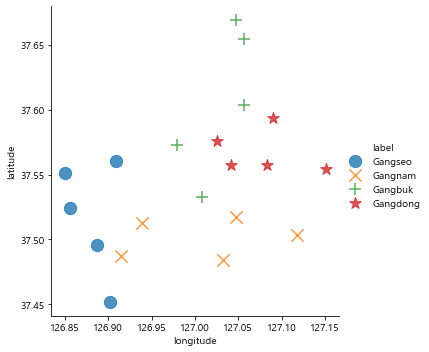

In [34]:
# 데이터 시각화

sns.lmplot("longitude", "latitude", data=train_df, fit_reg=False,
           markers=["o", "x", "+", "*"], hue="label", scatter_kws={"s":150})

In [36]:
# 구 이름과 동 이름을 삭제
train_df.drop(["district"], axis=1, inplace=True)
test_df.drop(["dong"], axis=1, inplace=True)

In [38]:
train_df
test_df

,longitude,latitude,label
0,126.854547,37.489853,Gangseo
1,126.859245,37.501394,Gangseo
2,126.847951,37.537759,Gangseo
3,126.815719,37.575817,Gangseo
4,126.891620,37.577039,Gangseo
5,127.030720,37.508838,Gangnam
6,127.057193,37.501163,Gangnam
7,127.018281,37.486401,Gangnam
8,126.988194,37.483279,Gangnam
9,127.043159,37.492896,Gangnam


In [39]:
X_train = train_df[["longitude", "latitude"]]
y_train = train_df[["label"]]

X_test = test_df[["longitude", "latitude"]]
y_test = test_df[["label"]]

In [41]:
# Label 값을 숫자로 변환

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_encode = le.fit_transform(y_train)
y_encode

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [42]:
clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_encode)

In [43]:
def display_decision_surface(clf, X, y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, \
                   edgecolor="black", s=200)
    
    plt.title("Decision surface of a dicision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=14)
    plt.xlabel("longitude", fontsize=16)
    plt.ylabel("latitude", fontsize=16)
    plt.show()

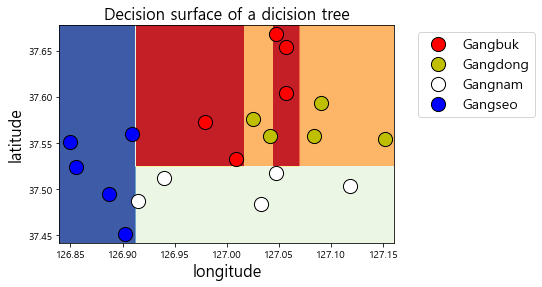

In [45]:
display_decision_surface(clf, X_train, y_encode)

# 떨어진 부분 과적합..

In [46]:
clf = DecisionTreeClassifier(random_state=35, max_depth=4, 
                            min_samples_leaf=2, min_samples_split=2).fit(X_train, y_encode)

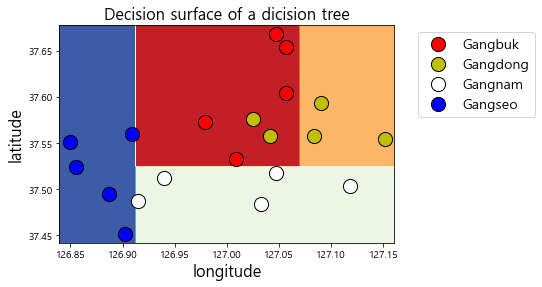

In [47]:
display_decision_surface(clf, X_train, y_encode)

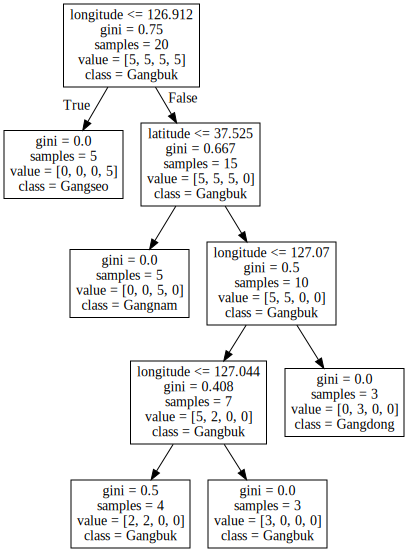

In [55]:
import os
import graphviz
from sklearn.tree import export_graphviz

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

graph = export_graphviz(clf, out_file=None, class_names=["Gangbuk", "Gangdong", "Gangnam", "Gangseo"], 
                feature_names=["longitude", "latitude"])

g = graphviz.Source(graph)
g.render("seoul")
g

In [56]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test.values, le.classes_[pred]))
# Decision Tree는 과적합될 확률이 높다

정확도 :  1.0


---
## Random Forest

- 핸즈온 p254-, 랜덤포레스트.pdf
- DecisionTree의 단점을 보완함
- 랜덤포레스트 : Bagging 방법을 적용한 DecisionTree의 앙상블
    - **Bagging** : 훈련 세트에서 중복을 허용하여 샘플링 하는 방식, bootstrap aggregating
- 앙상블(Ensemble) : 여러 개의 알고리즘을 사용
    - Vote 방식
        + 간접 투표(Soft Voting) : 개별 분류기(알고리즘)의 예측을 평균 내어 확률이 가장 높은 클래스를 예측
        + 직접 투표(Hard Voting) : 각 분류기(알고리즘)의 예측을 모아서 가장 많이 선택된 클래스를 예측, 선거처럼 다수결 투표
    - 종류
        - Voting
            + 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
            + 같은 데이터셋(전체 데이터)에서 서로 다른 알고리즘을 가진 분류기를 결합
            
        - Bagging
            + 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
            + 샘플 데이터(전체 데이터 중 일부)에서 각각의 분류기가 모두 같은 유형의 알고리즘 기반
            + 대표적 알고리즘 : **Random Forest**
            
        - Boosting
            + 여러 개의 분류기가 순차적으로 학습을 하되, 앞에서 학습한 분류기가 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에서 가중치를 부여함 (not random)
            + 랜덤 포레스트보다 좋은 성능을 기대할 수 있다.
            + 대표적 알고리즘 : **Gradient Boosting** - 경사하강법으로 최적의 오차를 찾음, 단, 데이터 학습하는데 시간이 오래 걸린다
            + **XGBoost(Expand Gradient Boosting), Light GBM, Stacking** : Gradient Boosting보다 성능 개선됨
            
![nn](data/votingvsbagging.jpg)


+ 병렬 수행
    - n_jobs
    
    
+ 파라미터
    - n_estimators
    - max_features
    - max_depth

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [66]:
X, y = datasets.make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [68]:
forest = RandomForestClassifier(random_state=2, n_estimators=5) # n_estimators:작은 트리 개수
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

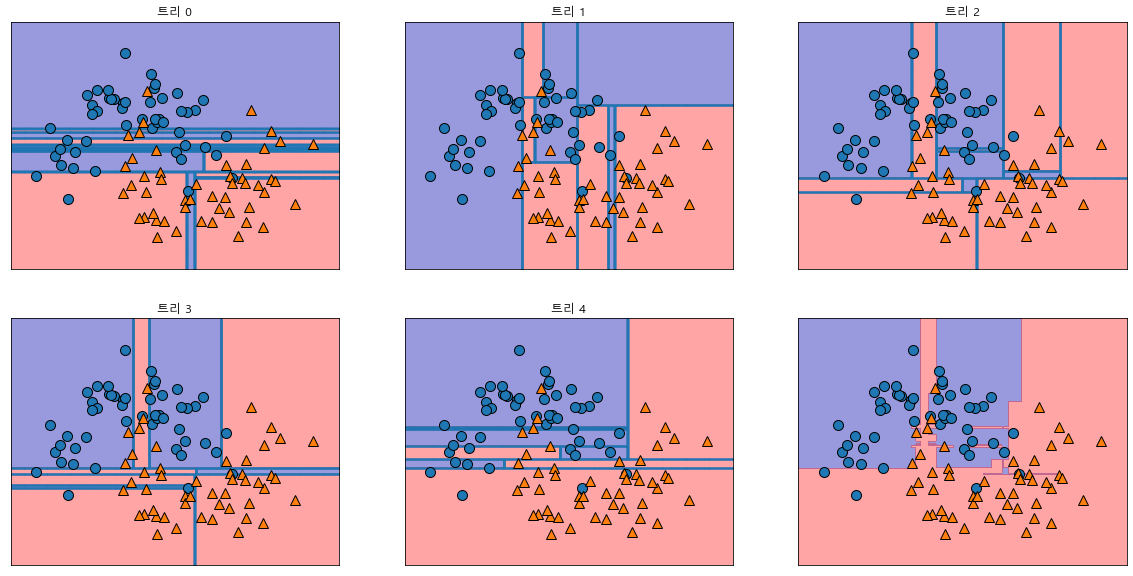

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

## Decision Tree vs Random Forest

- Decision Tree는 큰 나무 한개 : 중요도가 큰 특성 사용
- Random Forest는 작은 나무 여러 개 : 여러 특성 중에서 voting

### 1. Cancer 데이터 활용

In [70]:
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [78]:
model1 = DecisionTreeClassifier(max_depth=3, random_state=0)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [79]:
print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))
# max_depth(가지치기)로 과적합 해소

훈련 정확도 :  0.9765258215962441
테스트 정확도 :  0.9370629370629371


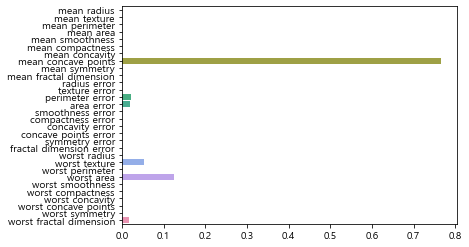

In [80]:
sns.barplot(x=model1.feature_importances_, y=cancer.feature_names)
# 의사결정나무에서는 몇가지 특성들만 사용됨(mean concave points의 중요도가 매우 높음)

In [81]:
model2 = RandomForestClassifier(random_state=0, n_estimators=100)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [82]:
print("훈련 정확도 : ", model2.score(X_train, y_train))
print("테스트 정확도 : ", model2.score(X_test, y_test))
# 과적합이긴 하나, 성능 향상됨

훈련 정확도 :  1.0
테스트 정확도 :  0.972027972027972


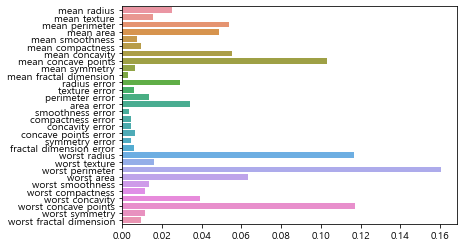

In [85]:
sns.barplot(x=model2.feature_importances_, y=cancer.feature_names)
# 랜덤포레스트에서는 여러 특성들이 사용됨

### 2. 손글씨 이미지 데이터 활용

In [86]:
mnist = datasets.load_digits()
print(mnist.data.shape)
mnist.target

(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

In [87]:
X, y = mnist.data, mnist.target

In [94]:
# 교차 검증(Cross Validation)을 위한 공용 함수
from sklearn.model_selection import cross_val_score

def cross_validation(clf, features, labels):
    cv_scores = []
    
    for i in range(10):
        scores = cross_val_score(clf, features, labels, cv=10, scoring="accuracy")
        cv_scores.append(scores.mean())
        
    return cv_scores

In [95]:
dt_cv_scores = cross_validation(DecisionTreeClassifier(), X, y)
rf_cv_scores = cross_validation(RandomForestClassifier(), X, y)

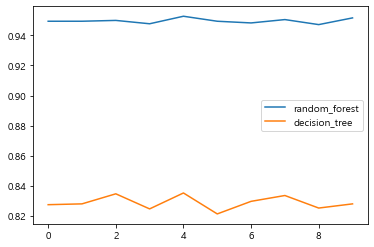

In [99]:
df = pd.DataFrame({"random_forest": rf_cv_scores, "decision_tree": dt_cv_scores})
df.head()
df.plot()
# Random Forest 성능이 Decision Tree보다 우세하다

In [102]:
print(np.mean(dt_cv_scores))
print(np.mean(rf_cv_scores))
# Random Forest 성능이 Decision Tree보다 우세하다

0.8287982619491
0.9495729360645562


### 사례1 : 독버섯 데이터 활용

+ https://archive.ics.uci.edu/ml/index.php
+ Sol1)
+ https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
+ 파일명을 mushrooms.csv로 변경

In [103]:
# Sol2)
import urllib.request as req

savedir = "data/mushrooms.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, savedir)
print("다운로드 완료")

다운로드 완료


In [4]:
mr = pd.read_csv("data/mushrooms.csv", header=None)
mr.shape
mr.head()
# 0: 종속변수(p:poison 독 e: eatable 식용) 1~22: 독립변수(feature)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# 결측치 확인
mr.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [6]:
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
# 데이터와 레이블 분리
X = mr.drop(0, axis=1)
y = mr[0]

In [8]:
X.head()
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: 0, Length: 8124, dtype: object

In [9]:
# 데이터를 숫자화
from sklearn.preprocessing import LabelEncoder

encoder_X = LabelEncoder()

for col in X.columns:
    X[col] = encoder_X.fit_transform(X[col])

encoder_y = LabelEncoder()
y = encoder_y.fit_transform(y)

In [10]:
X.head()
y

array([1, 0, 0, ..., 0, 1, 0])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
# decision tree, knn, logistic regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [116]:
clf = RandomForestClassifier().fit(X_train, y_train)

In [117]:
pred = clf.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score, classification_report

print("정답률 : ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정답률 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1047
           1       1.00      1.00      1.00       984

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [12]:
# decision tree, knn, logistic regression

In [19]:
# decision tree

clf = DecisionTreeClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정답률 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       1.00      1.00      1.00       949

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [20]:
# knn

clf = KNeighborsClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정답률 :  0.9975381585425899
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       1.00      1.00      1.00       949

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [21]:
# logistic regression

clf = LogisticRegression().fit(X_train, y_train)
pred = clf.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정답률 :  0.947316592811423
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1082
           1       0.94      0.95      0.94       949

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---
## Gradient Boosting Regression Tree

+ 분류와 회귀에서 모두 사용 가능
+ 이전 트리의 오차를 보완하는 방식으로 트리 생성(경사하강법(Gradient Descent))
+ Random Forest보다는 매개변수 설정에 조금 더 민감하지만, 잘 조정하면 더 높은 정확도를 제공
+ learning_rate를 사용하여 오차 보정

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [23]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [24]:
?GradientBoostingClassifier

In [27]:
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.958041958041958


In [28]:
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


In [29]:
tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9929577464788732
테스트 정확도 :  0.958041958041958


훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


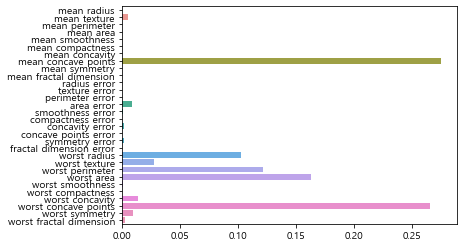

In [30]:
# 특성 중요도
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

---
## Voting Classifier

In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [33]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=156, test_size=0.2)

In [49]:
lr_clf = LogisticRegression(max_iter=10000)
knn_clf = KNeighborsClassifier(n_neighbors=8)

In [50]:
vo_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting="soft")

In [51]:
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=10000)),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [52]:
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도 : ", accuracy_score(y_test,pred))

Voting 분류기 정확도 :  0.9473684210526315


In [53]:
classifiers = [lr_clf, knn_clf]

for clf in classifiers:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    class_name = clf.__class__.__name__
    print("{0} 정확도 : {1:4f}".format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.964912
KNeighborsClassifier 정확도 : 0.938596


In [56]:
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print(accuracy_score(y_test, pred))

knn_clf.fit(X_train, y_train)
pred = knn_clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9649122807017544
0.9385964912280702


---
## Grid Search

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_moons

In [81]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [83]:
# 기본값으로 확인
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict(X_test)

print("훈련 정확도 : ", clf.score(X_train, y_train))
print("테스트 정확도 : ", clf.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.936


In [65]:
from sklearn.model_selection import GridSearchCV

In [75]:
params = {
    'n_estimators':[100, 200, 300],
    'max_depth':[2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf':[1, 2, 3, 4, 5],
    'min_samples_split':[4, 8, 10, 11, 12, 13, 14]
}

clf2 = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(clf2, param_grid=params, cv=2, n_jobs=-1)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 8, 10, 11, 12, 13, 14],
                         'n_estimators': [100, 200, 300]})

In [76]:
print("최적의 하이퍼 파라미터\n", grid_cv.best_params_)
print("최고 예측 정확도 : ", grid_cv.best_score_)

최적의 하이퍼 파라미터
 {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 :  0.8389046941678521


In [77]:
pred = grid_cv.best_estimator_.predict(X_test)
print("정확도 : ", accuracy_score(y_test, pred))

정확도 :  0.8


In [78]:
# Gradient Boosting

params = {
    'n_estimators':[100, 200],
    'learning_rate':[0.1, 0.01, 0.001],
    'max_depth':[3, 4, 5, 6, 7]
}

In [79]:
# Gradient Boosting
clf3 = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
clf3.predict(X_test)

print("훈련 정확도 : ", clf3.score(X_train, y_train))
print("테스트 정확도 : ", clf3.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.88


In [80]:
params = {
    'n_estimators':[100, 200],
    'learning_rate':[0.1, 0.01, 0.001, 1],
    'max_depth':[3, 4, 5, 6, 7]
}

clf4 = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(clf4, param_grid=params, cv=2, verbose=1)

grid_cv.fit(X_train, y_train)

print("최적의 하이퍼 파라미터\n", grid_cv.best_params_)
print("최고 예측 정확도 : ", grid_cv.best_score_)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


최적의 하이퍼 파라미터
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
최고 예측 정확도 :  0.8392603129445235


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   12.4s finished
